In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:

df = pd.read_csv(r'E:\prodigy\task 1\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
df.isnull().sum()

df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())


In [38]:
X = df[['total_rooms', 'total_bedrooms', 'households']]
y = df['median_house_value']


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [43]:
y_pred = model.predict(X_test)

y_pred[:10]


array([179615.33820272, 248815.49915122, 312498.29907723, 244755.66930401,
       214787.40281658, 322572.2223454 , 163074.28993622, 165892.38547856,
       226391.80791834, 206353.05870428])

In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 12715221806.477415
R-squared (R²): 0.029675313767584366


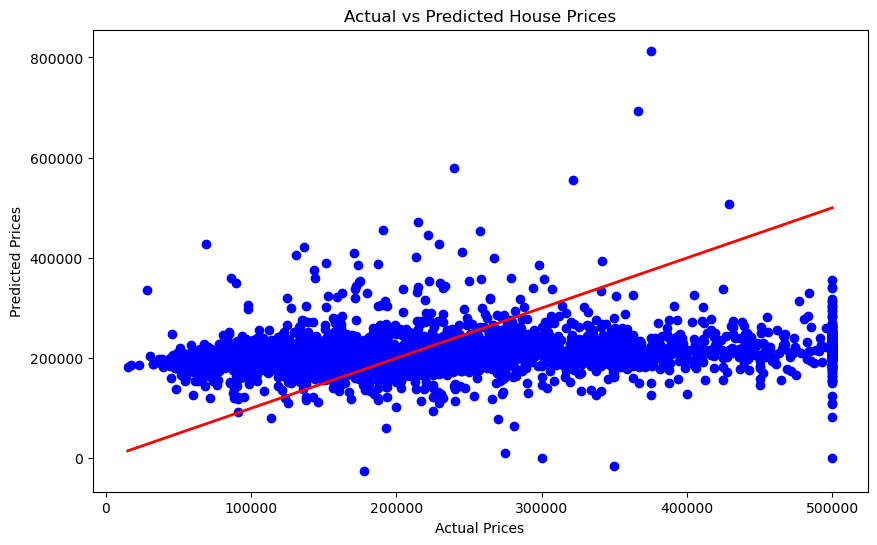

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [46]:
def predict_price(square_footage, bedrooms, bathrooms):
    input_data = pd.DataFrame({
        'total_rooms': [square_footage], 
        'total_bedrooms': [bedrooms], 
        'households': [bathrooms]  
    })
    
    predicted_price = model.predict(input_data)
    
    return predicted_price[0]

square_footage = 2000  
bedrooms = 3  
bathrooms = 2 

predicted_price = predict_price(square_footage, bedrooms, bathrooms)
print(f"The predicted house price is: ${predicted_price}")


The predicted house price is: $265256.04070233763


In [47]:
def predict_price(square_footage, bedrooms, bathrooms):
    input_data = pd.DataFrame({
        'total_rooms': [square_footage], 
        'total_bedrooms': [bedrooms], 
        'households': [bathrooms]
    })
    
    predicted_price = model.predict(input_data)
    
    return predicted_price[0]

square_footage = 400  
bedrooms = 2  
bathrooms = 1  #

predicted_price = predict_price(square_footage, bedrooms, bathrooms)
print(f"The predicted house price is: ${predicted_price}")


The predicted house price is: $210287.64797938318
